## 1. Low Level Implementation to Keras

In [1]:
import random
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential # both used for defining  the networks
from keras import regularizers
from keras.layers.core import Dense, Activation # defining the layers
from keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from keras import backend as K
# IMAGE ORDERING: Tensorflow(64,64,3), Theano(3,64,64)
K.set_image_dim_ordering('tf') # always check you are using the correct image dimension
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Data Preprocessing

In [3]:
# load the mnist datasets (auto or pre dowloaded in ./keras)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# ptint the data shape
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
## optimize training speed by preprocessing your image to unit range
X_train /=255
X_test /=255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples') 

batch_size = 128
nb_classes = 10
nb_epoch = 10
# convert class vectors to binary class matrices for softmax layer
Y_train  = keras.utils.np_utils.to_categorical(y_train, nb_classes)
Y_test   = keras.utils.np_utils.to_categorical(y_test, nb_classes)
# for example the one-hot encoding for number 6 is [0,0,0,0,0,0,1,0,0,0,0]
print(Y_train.shape)

((60000, 28, 28), (60000,))
((10000, 28, 28), (10000,))
(60000, 'train samples')
(10000, 'test samples')
(60000, 10)


# Keras main steps for building a model

### Step1: Model Design. (What's the architecture?)
#### There're two types of models:
    - Sequential class --> use this if your model is a sequence of layers and there's only a single path between input and output
    - Model class (Functional API) --> using this can let you build many pathes from input to output

The following code is similar to the below image, you're doing nothing except that you're adding layers next to each other
<img src="imgs/buildingblocks.jpg" height="300" width = "300" >

In [4]:
## model type is either sequential or model, sequential will be almost enough for our course
model = Sequential()
## now we have an empty model that will be created through sequentially adding layers to it.

## add a layer that takes the input image and pass it through a fully connected layer with 512 hidden nodes
## dense layer ==> fully connected layer
model.add(Dense(512,input_shape=(784,)))

## note that the previous instruction haven't added any activation to the output of the dot product
## so we'll add an activation layer with sigmoid activation
model.add(Activation('sigmoid'))
## then add another dense layer to the previous layer
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dense(10))
## add a final classification layer, the softmax is explained in the following image
model.add(Activation('softmax'))

<img src="imgs/softmax.png" height="800" width = "800" >

### Step2: Compiling the model. (Optimization Algorithm, Loss function, and Evaluation Metrics)
#### - Optimizers (for each minibatch, which optimizer would you use to update your weights?)
    - sgd
    - rmsprop
    - adagrad
    - adadelta
    - adam (currently the best)
#### - loss (what is the main objective function you're minimizing?)
    - mean_squared_error (better in regression problems)
    - categorical_crossentropy (better in classification problems)
#### - mertics (what do you want to measure for each epoch?)
    - binary_accuracy (for binary classification)
    - categorical_accuracy (for multiclass classification (usually associated with the softmax layer))

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',#RMSprop()
              metrics=['accuracy'])

### Step3: Fitting the Model. (Connecting the data to the model, How many epochs .. etc)

In [6]:
history1 = model.fit(X_train,Y_train,
                    batch_size = batch_size,epochs=nb_epoch,
                    verbose=1,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s - loss: 2.2718 - acc: 0.1885 - val_loss: 2.2276 - val_acc: 0.3630
Epoch 2/10
60000/60000 [==============================] - 16s - loss: 2.1869 - acc: 0.3957 - val_loss: 2.1358 - val_acc: 0.4570
Epoch 3/10
60000/60000 [==============================] - 22s - loss: 2.0778 - acc: 0.5237 - val_loss: 1.9996 - val_acc: 0.5939
Epoch 4/10
60000/60000 [==============================] - 18s - loss: 1.9164 - acc: 0.6005 - val_loss: 1.8038 - val_acc: 0.5636
Epoch 5/10
60000/60000 [==============================] - 15s - loss: 1.6959 - acc: 0.6499 - val_loss: 1.5574 - val_acc: 0.6944
Epoch 6/10
60000/60000 [==============================] - 14s - loss: 1.4496 - acc: 0.6975 - val_loss: 1.3156 - val_acc: 0.7554
Epoch 7/10
60000/60000 [==============================] - 14s - loss: 1.2291 - acc: 0.7379 - val_loss: 1.1175 - val_acc: 0.7659
Epoch 8/10
60000/60000 [==============================

In [60]:
## trying to fit another model with just changing the optimizer in the compilation process
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history2 = model.fit(X_train,Y_train,
                    batch_size = batch_size,epochs=nb_epoch,
                    verbose=1,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 23s - loss: 0.3659 - acc: 0.8906 - val_loss: 0.2324 - val_acc: 0.9255
Epoch 2/10
60000/60000 [==============================] - 19s - loss: 0.1927 - acc: 0.9406 - val_loss: 0.1684 - val_acc: 0.9491
Epoch 3/10
60000/60000 [==============================] - 22s - loss: 0.1588 - acc: 0.9516 - val_loss: 0.1600 - val_acc: 0.9505
Epoch 4/10
60000/60000 [==============================] - 27s - loss: 0.1393 - acc: 0.9571 - val_loss: 0.1384 - val_acc: 0.9574
Epoch 5/10
60000/60000 [==============================] - 27s - loss: 0.1254 - acc: 0.9607 - val_loss: 0.1334 - val_acc: 0.9600
Epoch 6/10
60000/60000 [==============================] - 31s - loss: 0.1139 - acc: 0.9647 - val_loss: 0.1223 - val_acc: 0.9632
Epoch 7/10
60000/60000 [==============================] - 23s - loss: 0.1049 - acc: 0.9675 - val_loss: 0.1258 - val_acc: 0.9628
Epoch 8/10
60000/60000 [==============================

## Bad Weight Initialization

In [64]:
from keras.initializers import RandomNormal

init = RandomNormal(mean=0.0, stddev=5, seed=None)

model2 = Sequential()
model2.add(Dense(512,input_shape=(784,),kernel_initializer=init))

model2.add(Activation('sigmoid'))
model2.add(Dense(512,kernel_initializer=init))
model2.add(Activation('sigmoid'))
model2.add(Dense(10,kernel_initializer=init))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history3 = model2.fit(X_train,Y_train,
                    batch_size = batch_size,epochs=nb_epoch*3,
                    verbose=1,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 22s - loss: 14.4853 - acc: 0.0914 - val_loss: 14.4499 - val_acc: 0.0922
Epoch 2/30
60000/60000 [==============================] - 19s - loss: 14.3854 - acc: 0.0954 - val_loss: 14.3593 - val_acc: 0.0964
Epoch 3/30
60000/60000 [==============================] - 21s - loss: 14.2503 - acc: 0.1005 - val_loss: 14.1989 - val_acc: 0.1017
Epoch 4/30
60000/60000 [==============================] - 20s - loss: 14.0753 - acc: 0.1074 - val_loss: 14.0370 - val_acc: 0.1075
Epoch 5/30
60000/60000 [==============================] - 18s - loss: 13.8478 - acc: 0.1172 - val_loss: 13.8046 - val_acc: 0.1209
Epoch 6/30
60000/60000 [==============================] - 19s - loss: 13.6522 - acc: 0.1283 - val_loss: 13.7043 - val_acc: 0.1251
Epoch 7/30
60000/60000 [==============================] - 20s - loss: 13.5262 - acc: 0.1348 - val_loss: 13.5574 - val_acc: 0.1315
Epoch 8/30
60000/60000 [================

### Comparing the three previous experiments

| optimizer                                                   | number of epochs | total time / average time per epoch | resulting accuracy |
|-------------------------------------------------------------|------------------|-------------------------------------|--------------------|
| sgd                                                         |        30        |           750 sec /25 sec           |        89.1%       |
| rmsprop                                                     |        10        |           200 sec /20 sec           |        98.9%       |
| sgd and weight initialization with normal dist with std = 5 |        30        |            750 sec/25 sec           |        25.3%       |

# Working on CIFAR-10 dataset using previous model

In [41]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples') 

batch_size = 128
nb_classes = 10
nb_epoch = 10
# convert class vectors to binary class matrices for softmax layer
Y_train  = keras.utils.np_utils.to_categorical(y_train, nb_classes)
Y_test   = keras.utils.np_utils.to_categorical(y_test, nb_classes)
# for example the one-hot encoding for number 6 is [0,0,0,0,0,0,1,0,0,0,0]
print(Y_train.shape)

## Complete the code and construct a model and fit it using cifar-10 data

## also you can look at other sample datasets included in keras library https://keras.io/datasets/

((50000, 32, 32, 3), (50000, 1))
((10000, 32, 32, 3), (10000, 1))
(50000, 'train samples')
(10000, 'test samples')
(50000, 10)


In [42]:
## model type is either sequential or model, sequential will be almost enough for our course
model = Sequential()
## now we have an empty model that will be created through sequentially adding layers to it.

## add a layer that takes the input image and pass it through a fully connected layer with 512 hidden nodes
## dense layer ==> fully connected layer
model.add(Dense(20,input_shape=(3072,)))

## note that the previous instruction haven't added any activation to the output of the dot product
## so we'll add an activation layer with sigmoid activation
model.add(Activation('sigmoid'))
model.add(Dense(10))
## add a final classification layer, the softmax is explained in the following image
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history4 = model.fit(X_train,Y_train,
                    batch_size = batch_size,epochs=nb_epoch*10,
                    verbose=1,validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s - loss: 2.2699 - acc: 0.1750 - val_loss: 2.2127 - val_acc: 0.2255
Epoch 2/100
50000/50000 [==============================] - 4s - loss: 2.1734 - acc: 0.2489 - val_loss: 2.1392 - val_acc: 0.2538
Epoch 3/100
50000/50000 [==============================] - 4s - loss: 2.1105 - acc: 0.2686 - val_loss: 2.0858 - val_acc: 0.2683
Epoch 4/100
50000/50000 [==============================] - 4s - loss: 2.0635 - acc: 0.2814 - val_loss: 2.0444 - val_acc: 0.2877
Epoch 5/100
50000/50000 [==============================] - 4s - loss: 2.0265 - acc: 0.2952 - val_loss: 2.0115 - val_acc: 0.2990
Epoch 6/100
50000/50000 [==============================] - 5s - loss: 1.9964 - acc: 0.3055 - val_loss: 1.9848 - val_acc: 0.3149
Epoch 7/100
50000/50000 [==============================] - 4s - loss: 1.9709 - acc: 0.3156 - val_loss: 1.9622 - val_acc: 0.3220
Epoch 8/100
50000/50000 [=============================

(3072, 20)


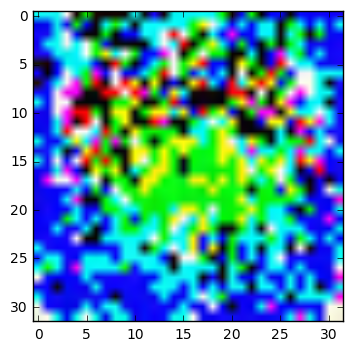

In [67]:

## not sure 100% that this is the correct way
W = model.layers[0]
weights = W.get_weights()
print weights[0].shape
weights = weights[0][:,10].T
weights = weights.reshape(32,32,3)
weights = weights[::-1]
weights.shape
plt.imshow(weights)

In [13]:
history1.params # very useful in paper

{'batch_size': 128,
 'do_validation': True,
 'epochs': 10,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 60000,
 'verbose': 1}

{'acc': [0.18853333334922789, 0.39565, 0.52374999996821081, 0.60046666669845583, 0.64988333330154424, 0.6975166666984558, 0.73789999996821087, 0.76710000003178913, 0.78651666663487751, 0.80205000000000004], 'loss': [2.2717562311808268, 2.1868991430918374, 2.0778118348439536, 1.9164432200749715, 1.6959417072931926, 1.4496119697570802, 1.2290501436233521, 1.0573431895891825, 0.92885426677068073, 0.83220344820022585], 'val_acc': [0.36299999999999999, 0.45700000000000002, 0.59389999999999998, 0.56359999999999999, 0.69440000000000002, 0.75539999999999996, 0.76590000000000003, 0.78810000000000002, 0.80779999999999996, 0.81210000000000004], 'val_loss': [2.2275810401916503, 2.135832176208496, 1.9995805866241456, 1.8038016445159912, 1.5573825456619264, 1.3155510105133057, 1.1175444147109985, 0.97031558790206907, 0.85954036149978641, 0.77550275554656978]}


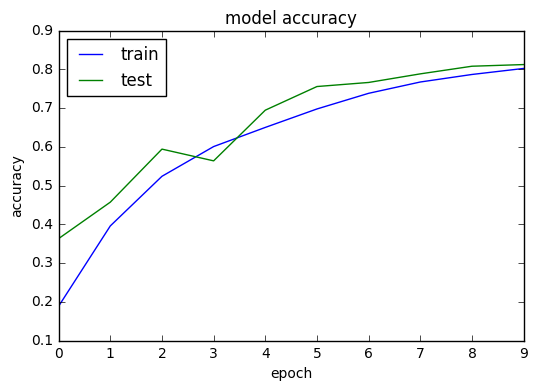

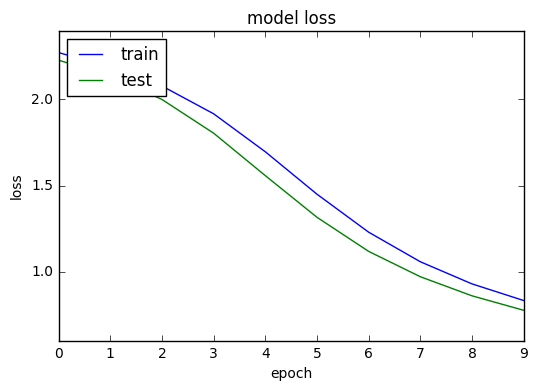

In [21]:
print history1
print history1.history
history = history1
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test acccuracy:", score[1])

('Test loss:', 0.7755027621269226)
('Test acccuracy:', 0.81210000000000004)


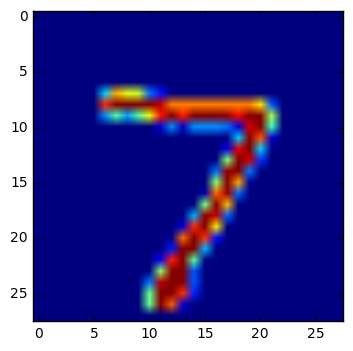

In [16]:
X_test_0 = X_test[0,:].reshape(1,784)
Y_test_0 = Y_test[0,:]
plt.imshow(X_test_0.reshape((28,28)))

In [17]:
pred = model.predict(X_test_0[:])
print('Label of testing sample: ',np.argmax(Y_test_0))
print('Output of the softmax layer', pred[0])
print('Network prediction:', np.argmax(pred[0]))# for the output is a probability distribution

('Label of testing sample: ', 7)
('Output of the softmax layer', array([  2.00780830e-03,   1.47200457e-03,   1.20408530e-03,
         6.80704182e-03,   3.61493602e-02,   1.66471507e-02,
         6.18125079e-04,   8.03395331e-01,   1.03577301e-02,
         1.21341445e-01], dtype=float32))
('Network prediction:', 7)
